In [1]:
import numpy as np, cv2
import matplotlib.pyplot as plt

In [2]:
# load Model and Test
loaded = np.load("utils\\dataset.npz")
x = loaded['x']
y = loaded['y']

In [3]:
def remove_noise(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    bg = cv2.morphologyEx(img, cv2.MORPH_DILATE, se)
    
    out_gray = cv2.divide(img, bg, scale=255)
    out_binary = cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU)[1]
    
    return cv2.cvtColor(out_binary,cv2.COLOR_GRAY2RGB)
    

# Normalize and remove noise the image
x_norm = []
for idx, data in enumerate(x):
    data = cv2.resize(data, (48, 48))
    noiseless = remove_noise(data)
    normalized = cv2.normalize(noiseless, noiseless, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    x_norm.append(normalized)
x_norm = np.asarray(x_norm)

In [4]:
# Lets do the cross validation
from sklearn.model_selection import StratifiedKFold as skf

skf_model = skf(n_splits=4, random_state=8, shuffle=True)
for train_idx, test_idx in skf_model.split(x, y):
    x_train, x_test = x_norm[train_idx], x_norm[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [5]:
from collections import Counter

counter = Counter(y_train)
for k, v in counter.items():
    per= v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=3000 (14.148%)
Class=1, n=3072 (14.487%)
Class=2, n=5411 (25.518%)
Class=3, n=3723 (17.557%)
Class=4, n=3622 (17.081%)
Class=5, n=2377 (11.210%)


In [6]:
counter = Counter(y_test)
for k, v in counter.items():
    per= v / len(y_test) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=1000 (14.148%)
Class=1, n=1024 (14.488%)
Class=2, n=1803 (25.509%)
Class=3, n=1241 (17.558%)
Class=4, n=1207 (17.077%)
Class=5, n=793 (11.220%)


In [7]:
print(y_train.shape)
print(y_test.shape)

(21205,)
(7068,)


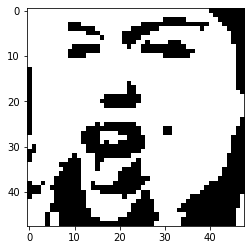

In [8]:
# Lets Experiment the data augmentation
image = x_train[1000]
plt.imshow(image)

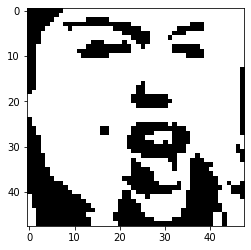

In [9]:
image = cv2.flip(image, 2)
plt.imshow(image)

In [10]:
# Lets augment the data only for train
augmented_x_train = []
augmented_y_train = []
for idx, img_train in enumerate(x_train):
    augmented_x_train.append(cv2.flip(img_train, 2))
    augmented_y_train.append(y_train[idx])
    
augmented_x_train = np.asarray(augmented_x_train)
augmented_y_train = np.asarray(augmented_y_train)

In [11]:
# Make it one array
x_train = x_train.tolist()
y_train = y_train.tolist()
for idx, img_augmented in enumerate(augmented_x_train):
    x_train.append(img_augmented)
    y_train.append(augmented_y_train[idx])
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [12]:
np.savez("utils\\train.npz", x=x_train, y=y_train)
np.savez("utils\\test.npz", x=x_test, y=y_test)

In [13]:
counter = Counter(y_train)
for k, v in counter.items():
    per= v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=6000 (14.148%)
Class=1, n=6144 (14.487%)
Class=2, n=10822 (25.518%)
Class=3, n=7446 (17.557%)
Class=4, n=7244 (17.081%)
Class=5, n=4754 (11.210%)


In [14]:
counter = Counter(y_test)
for k, v in counter.items():
    per= v / len(y_test) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=1000 (14.148%)
Class=1, n=1024 (14.488%)
Class=2, n=1803 (25.509%)
Class=3, n=1241 (17.558%)
Class=4, n=1207 (17.077%)
Class=5, n=793 (11.220%)


In [15]:
y_train.shape

(42410,)